## Homework 11

### №1. Ex 14.7, p.581. Solve for coefficients of Boosted Tree Model.

Derive (14.51) and (14.52) in Section 14.5.1. Show that $\hat{µ}$ is not unique, and characterize the family of equivalent solutions.

In order to fing $\mu$ and $\lambda_{i}$ we need to solve minimisation problem (14.50):

> $\underset{\mu,\{\lambda_{i}\},V_{q}}{min}\mathop{\sum}\Vert x_{i}-\mu-V_{q}\lambda_{i}\Vert^{2}$

**NOTE** According to the FOIL rule with application to matrices:

> $‖a−b‖^{2}=(a−b)^{T}(a−b)=a^{T}a−a^{T}b−ab^{T}+b^{T}b$

Firstly, let us solve minimisation problem for $\lambda_{i}$. In order to do that we simplify the initial equation :


> $\mathop{\sum}\Vert x_{i}-\mu-V_{q}\lambda_{i}\Vert^{2}=\sum[(x_{i}-\mu)^{T}(x_{i}-\mu)-(x_{i}-\mu)^{T}V_{q}\lambda_{i}-(x_{i}-\mu)(V_{q}\lambda_{i})^{T}+\lambda_{i}^{T}V_{q}^{T}V_{q}\lambda_{i}]$

Then we take the derivate with respect to $\lambda_i$:
>$2V_{q}^{T}V_{q}\lambda_{i}-2(x_{i}-\mu)^{T}V_{q}=0$
>
>$2(x_{i}-\mu)^{T}V_{q}\lambda_{i}=2V_{q}^{T}V_{q}\lambda_{i}$ \\

Since $V_q$ is an orthogonal matrix with q orthogonal unit vectors then $V_{q}^{T}V_{q}=I_q$, thus:

>$\lambda_{i}=V_{q}^T(x_{i}-\mu)$

Now let us find $\mu$ from the first order condition with respect to $\mu$:


> $\frac{\partial}{\partial\mu}\mathop{\sum}\Vert x_{i}-\mu-V_{q}\lambda_{i}\Vert^{2}=-2\sum(x_{i}-\mu-V_{q}\lambda_{i})=0$ \\
>
>$\sum x_{i}-N\mu-V_{q}\sum\lambda_{i}=0$
>
>$\mu=\bar{x}-\frac{1}{N}V_{q}\sum\lambda_{i}$

Plugging in $\lambda_i$ we get:
>$\mu=\bar{x}-\frac{1}{N}V_{q}\sum V_{q}^T(x_{i}-\mu)$
>
>$\mu=\bar{x}-V_{q}V_{q}^T(\bar{x}-\mu)$
>
>$(I-V_{q}V_{q}^{T})(\bar{x}-\mu)=0$

Next stage of the solution was derived with the reference to [the answer of "user" on Math StackExchange](https://math.stackexchange.com/posts/2719957/revisions) in the discussion thread on the complement of the projection matrix. Since $V_qV_q^{T}$ is a projection matrix onto its rank q reconstruction $H_qx_i$, the orthogonal projection of $x_i$ onto the subspace spanned by the columns of $V_q$, then $(I-V_qV_q^{T})$ is a projection matrix onto $(H_{q}x_{i})_{\bot}$. Also suppose that $v$ is a vector, where $v=v_{(H_{q}x_{i})_{\bot}}+v_{(H_{q}x_{i})}$. \\

Thus, $\bar{x}-\mu$ should lie in the subspace spanned by the columns of $V_q$. Therefore, $\hat{\mu}=\bar{x}+v_{(H_{q}x_{i})_{\bot}}$, where $v_{(H_{q}x_{i})_{\bot}}$ is a vector that lies in the subspace spanned by the columns of $V_q$.

Finally, setting $v_{(H_{q}x_{i})_{\bot}}$ to zero we get the desired result:
>$\hat{\mu}=\bar{x}$
>
>$\hat{\lambda_{i}}=V_{q}^T(x_{i}-\bar{x})$

### №2. Ex 14.25, p.585. Compare NMF to PCA

In [1]:
options(warn=-1)

In [2]:
library(data.table)
install.packages('BiocManager', quiet=TRUE)
BiocManager::install('Biobase', quiet=TRUE)
install.packages('NMF', quiet=TRUE)
library(NMF)
library(repr)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Bioconductor version '3.10' is out-of-date; the current release version '3.12'
  is available with R version '4.0'; see https://bioconductor.org/install
'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.10 (BiocManager 1.30.12), R 3.6.1 (2019-07-05)
Installing package(s) 'Biobase'
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Old packages: 'BH', 'DBI', 'IRdisplay', 'IRkernel', 'KernSmooth', 'R6', 'Rcpp',
  'SQUAREM', 'TTR', 'askpass', 'backports', 'boot', 'broom', 'callr', 'cli',
  'clipr', 'cluster', 'codetools', 'colorspace', 'cpp11', 'crayon', 'curl',
  'data.table', 'dbplyr', 'digest', 'dplyr', 'e1071', 'evaluate', 'fansi',
  'forcats', 'foreach', 'formatR', 'fs', 'ggplot2', 'glmnet', 'gower', 'haven',
  'hexbin', 'hms', 'htmltools', 'htmlw

In [3]:
digit2 = fread('http://web.stanford.edu/~oleg2/hse/zip-code/digits/train.2') + 1
head(digit2, 3)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256
0,0,0,0,0,0.202,1.300,1.432,0.201,0.000,...,0.053,0.476,1.307,1.390,1.852,1.751,1.990,1.567,0.336,0
0,0,0,0,0,0.362,1.222,1.706,2.000,1.731,...,0.424,1.635,1.755,1.549,1.273,1.074,0.917,0.000,0.000,0
0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0


In [4]:
digit2 = t(apply(digit2, 2, function(x) as.numeric(x)))

### Original

null device 
          1

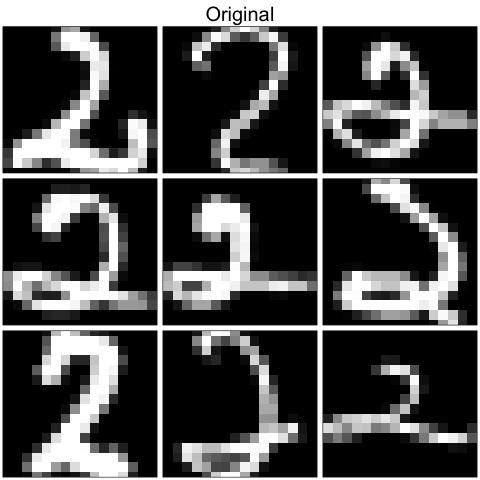

In [5]:
options(repr.plot.width=4, repr.plot.height=4)

par(mfrow=c(3, 3), mar=c(0.2, 0.2, 0.2, 0.2), oma=c(0, 0, 1.5, 0))
for (i in 1:9) {
    image(matrix(digit2[, i], 16, 16), ylim=c(1, 0), col=grey(seq(0, 1, len=256)), xaxt='n', yaxt='n')
}
mtext('Original', outer=TRUE, cex=1)
original = recordPlot()
plot.new()
dev.off()

### NMF

Let's fit a non-negative matrix factorization model (NMF) to the collection of two’s in the digits database. However, there shouldn't be any zeros in this collection:

In [6]:
digit2_nmf = digit2 + 0.000001

In [7]:
nmf = nmf(x=digit2_nmf, rank=25, method='brunet')

Now, let's get the $W$ and $H$ matrices:

In [8]:
W = basis(nmf)
H = coef(nmf)

In [9]:
head(W, 2)
head(H, 2)

V1,6.796335e-09,4.793873e-07,5.958977e-06,2.220446e-16,2.220446e-16,0.3133754,1.423938e-06,2.220446e-16,3.738413e-06,2.199493e-06,...,1.864992e-06,2.220446e-16,2.220446e-16,3.653248e-06,2.220446e-16,2.220446e-16,8.404255e-08,7.775416e-07,1.997615e-06,6.899173e-07
V2,3.648389e-07,5.512643e-07,2.584727e-06,2.220446e-16,2.220446e-16,1.6524666,1.261995e-06,2.220446e-16,1.291415e-06,6.783402e-07,...,2.165923e-06,2.220446e-16,9.616413e-07,3.129343e-06,2.220446e-16,2.220446e-16,2.132515e-07,5.430571e-07,6.618668e-06,2.823604e-06


2.220446e-16,1.195102e-01,4.639557e-08,2.220446e-16,2.998276e-08,2.220446e-16,2.572663e-02,4.945834e-08,9.040048e-08,1.056403e-01,...,5.261829e-08,1.901557e-08,1.528541e-02,4.355197e-02,8.328278e-08,2.220446e-16,2.220446e-16,2.014788e-08,1.419109e-08,6.221547e-08
2.220446e-16,2.220446e-16,4.692138e-10,1.826346e-03,2.785378e-08,1.031267e-01,2.220446e-16,2.220446e-16,2.551543e-08,2.220446e-16,...,5.276190e-08,2.220446e-16,2.220446e-16,2.220446e-16,1.084538e-08,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,8.306120e-09


null device 
          1

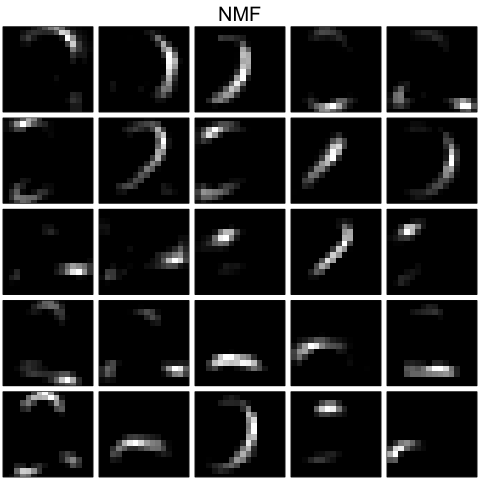

In [10]:
options(repr.plot.width=4, repr.plot.height=4)

par(mfrow=c(5, 5), mar=c(0.2, 0.2, 0.2, 0.2), oma=c(0, 0, 1.5, 0))
for (i in 1:25) {
    image(matrix(W[, i], 16, 16), ylim=c(1, 0), col=grey(seq(0, 1, len=256)), xaxt='n', yaxt='n')
}
mtext('NMF', outer=TRUE, cex=1)
nmf.w = recordPlot()
plot.new()
dev.off()

null device 
          1

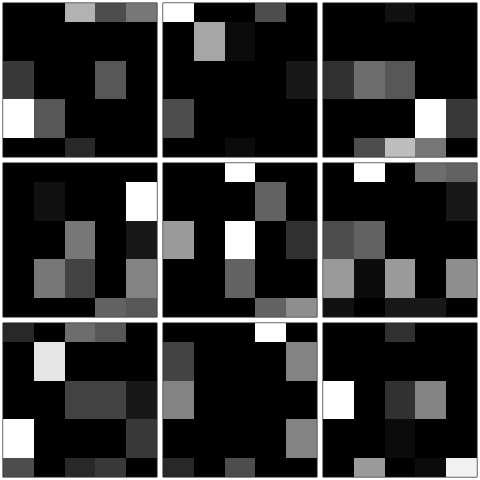

In [11]:
options(repr.plot.width=4, repr.plot.height=4)

par(mfrow=c(3, 3), mar=c(0.2, 0.2, 0.2, 0.2))
for (i in 1:9) {
    image(matrix(H[, i], 5, 5), ylim=c(1, 0), col=grey(seq(0, 1, len=25)), xaxt='n', yaxt='n')
}
nmf.h = recordPlot()
plot.new()
dev.off()

null device 
          1

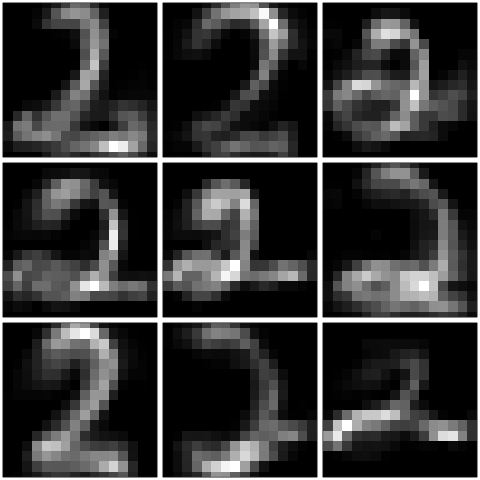

In [12]:
options(repr.plot.width=4, repr.plot.height=4)

par(mfrow=c(3, 3), mar=c(0.2, 0.2, 0.2, 0.2))
for (i in 1:9) {
    image(matrix(W %*% H[, i], 16, 16), ylim=c(1, 0), col=grey(seq(0, 1, len=256)), xaxt='n', yaxt='n')
}
nmf.wh = recordPlot()
plot.new()
dev.off()

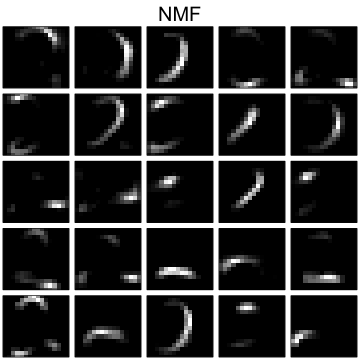

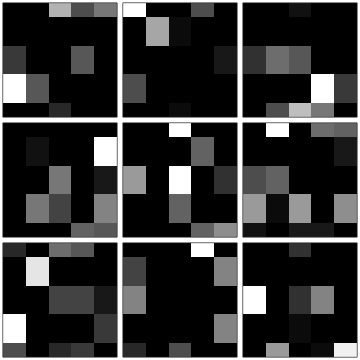

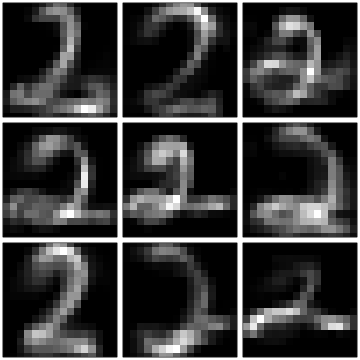

In [13]:
options(repr.plot.width=3, repr.plot.height=3)

par(mfrow=c(3, 1))
replayPlot(nmf.w)
replayPlot(nmf.h)
replayPlot(nmf.wh)

### PCA

In [14]:
pca = svd(x=digit2)
means = rowMeans(x=digit2)
W = cbind(digit2 %*% pca$v[, 1:24], means)
H = t(pca$v[, 1:25])

null device 
          1

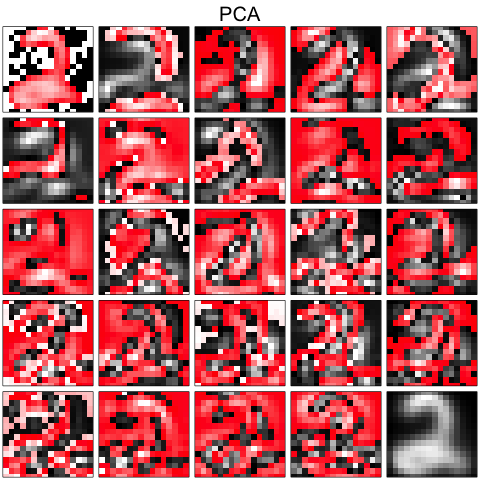

In [15]:
options(repr.plot.width=4, repr.plot.height=4)

par(mfrow=c(5, 5), mar=c(0.2, 0.2, 0.2, 0.2), oma=c(0, 0, 1.5, 0))
for (i in 1:25) {
    if (sum(W[, i] < 0) != 0) {
        colors = cbind(hsv(1, seq(0, 1, len=sum(W[, i] < 0)), 1), grey(seq(0, 1, len=sum(W[, i] >= 0))))
    }
    
    if (sum(W[, i] < 0) == 0) {
        colors = grey(seq(0, 1, len=128))
    }
    image(matrix(W[, i], 16, 16), ylim=c(1, 0), col=colors, xaxt='n', yaxt='n')
}
mtext('PCA', outer=TRUE, cex=1)
pca.w = recordPlot()
plot.new()
dev.off()

null device 
          1

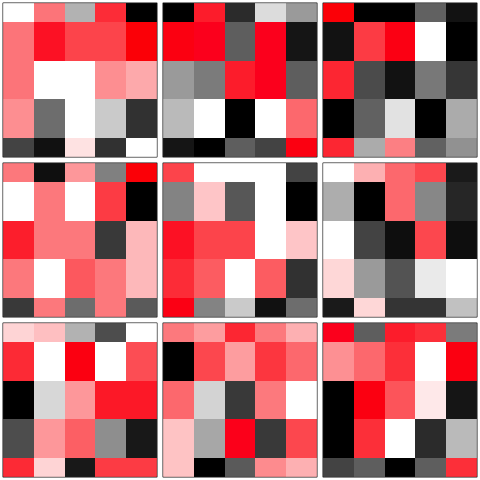

In [16]:
options(repr.plot.width=4, repr.plot.height=4)

par(mfrow=c(3, 3), mar=c(0.2, 0.2, 0.2, 0.2))
for (i in 1:9) {
    colors = cbind(hsv(1, seq(0, 1, len=sum(H[, i] < 0)), 1), grey(seq(0, 1, len=sum(H[, i] >= 0))))
    image(matrix(H[, i], 5, 5), ylim=c(1, 0), col=colors, xaxt='n', yaxt='n')
}
pca.h = recordPlot()
plot.new()
dev.off()

null device 
          1

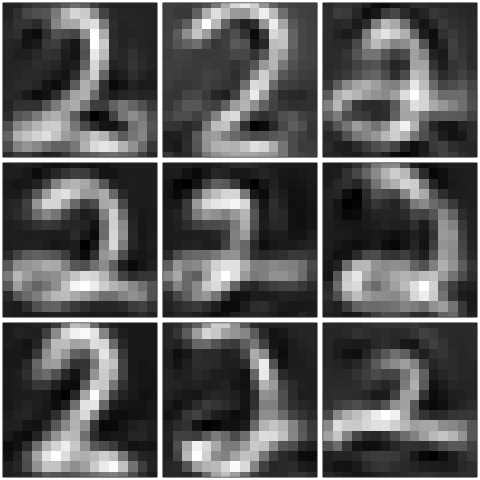

In [17]:
options(repr.plot.width=4, repr.plot.height=4)

par(mfrow=c(3, 3), mar=c(0.2, 0.2, 0.2, 0.2))
for (i in 1:9) {
    image(matrix(W %*% H[, i], 16, 16), ylim=c(1, 0), col=grey(seq(0, 1, len=256)), xaxt='n', yaxt='n')
}
pca.wh = recordPlot()
plot.new()
dev.off()

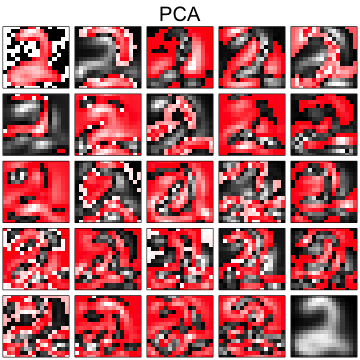

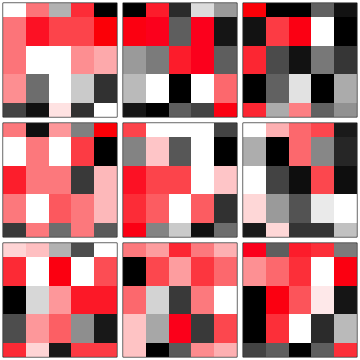

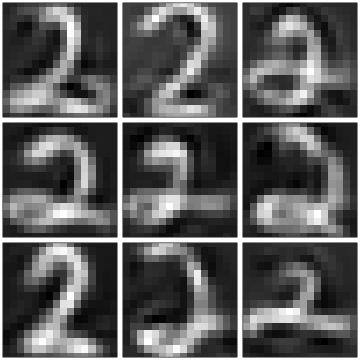

In [18]:
options(repr.plot.width=3, repr.plot.height=3)

par(mfrow=c(3, 1))
replayPlot(pca.w)
replayPlot(pca.h)
replayPlot(pca.wh)